In [1]:
#adding readxl package to import excel file
library(readxl)

In [2]:
#number of sheets in the Rdata file
excel_sheets('D://KAJAL//R//R data.xlsx')

[1] "Sheet1" "Sheet2"

In [3]:
#importing excel file a sper sheets 
data_sheet1=read_excel('D://KAJAL//R//R data.xlsx',sheet=1)
data_sheet2=read_excel('D://KAJAL//R//R data.xlsx',sheet=2)

In [4]:
#column names of the data
colnames(data_sheet1)
colnames(data_sheet2)

[1] "Rank"     "Language" "Share"    "Trend"

[1] "44075"                "43709"                "Programming Language"
[4] "Ratings"              "Change"

In [5]:
#renaming the column names in sheet 2 for easy access
names(data_sheet2)[names(data_sheet2) == "44075"] <- "Rank_2020"
names(data_sheet2)[names(data_sheet2) == "43709"] <- "Rank_2019"
names(data_sheet2)[names(data_sheet2) == "Programming Language"] <- "Programming_Language"

In [6]:
#retrieving first five records form the data
head(data_sheet1)
head(data_sheet2)

Rank,Language,Share,Trend
1,Python,31.56 %,2.8999999999999998E-2
2,Java,16.4 %,-3.1 %
3,Javascript,8.38 %,3.0000000000000001E-3
4,C#,6.5 %,-8.0000000000000002E-3
5,PHP,5.85 %,-0.5 %
6,C/C++,5.8 %,0


Rank_2020,Rank_2019,Programming_Language,Ratings,Change
1,2,C,0.1595,0.0074
2,1,Java,0.1348,-0.0318
3,3,Python,0.1047,0.0059
4,4,C++,0.0711,0.0148
5,5,C#,0.0458,0.0118
6,6,Visual Basic,0.0412,0.0083


In [7]:
#removing % symbol from Trend and Share column values of data sheet1
data_sheet1$Share=gsub('%','',data_sheet1$Share)
data_sheet1$Trend=gsub('%','',data_sheet1$Trend)
head(data_sheet1)

Rank,Language,Share,Trend
1,Python,31.56,2.8999999999999998E-2
2,Java,16.4,-3.1
3,Javascript,8.38,3.0000000000000001E-3
4,C#,6.5,-8.0000000000000002E-3
5,PHP,5.85,-0.5
6,C/C++,5.8,0


In [8]:
#checking for NA values in the data
sum(is.na(data_sheet1))
sum(is.na(data_sheet2))

[1] 0

[1] 0

In [9]:
#data types of the columns in the data
sapply(data_sheet1,FUN=class)
sapply(data_sheet2,FUN=class)

Rank    Language       Share       Trend 
  "numeric" "character" "character" "character"

Rank_2020            Rank_2019 Programming_Language 
           "numeric"            "numeric"          "character" 
             Ratings               Change 
           "numeric"            "numeric"

In [10]:
#converting character into numerical columns for statistics
data_sheet1$Share=as.numeric(data_sheet1$Share)
data_sheet1$Trend=as.numeric(data_sheet1$Trend)
class(data_sheet1$Share)
class(data_sheet1$Trend)

[1] "numeric"

[1] "numeric"

In [11]:
#descriptive summary of sheet1 
summary(data_sheet1)

      Rank         Language             Share             Trend        
 Min.   : 1.00   Length:28          Min.   : 0.0192   Min.   :-3.1000  
 1st Qu.: 7.75   Class :character   1st Qu.: 0.4975   1st Qu.:-0.1000  
 Median :14.50   Mode  :character   Median : 1.0850   Median : 0.0000  
 Mean   :14.50                      Mean   : 3.5028   Mean   :-0.1662  
 3rd Qu.:21.25                      3rd Qu.: 3.1125   3rd Qu.: 0.0020  
 Max.   :28.00                      Max.   :31.5600   Max.   : 0.0290  

In [12]:
#descriptive summary of sheet 2
summary(data_sheet2)

   Rank_2020       Rank_2019     Programming_Language    Ratings       
 Min.   : 1.00   Min.   : 1.00   Length:20            Min.   :0.00770  
 1st Qu.: 5.75   1st Qu.: 5.75   Class :character     1st Qu.:0.01205  
 Median :10.50   Median :10.50   Mode  :character     Median :0.01610  
 Mean   :10.50   Mean   :11.85                        Mean   :0.03809  
 3rd Qu.:15.25   3rd Qu.:16.50                        3rd Qu.:0.04235  
 Max.   :20.00   Max.   :33.00                        Max.   :0.15950  
     Change         
 Min.   :-0.031800  
 1st Qu.: 0.000025  
 Median : 0.002700  
 Mean   : 0.001875  
 3rd Qu.: 0.006500  
 Max.   : 0.014800  

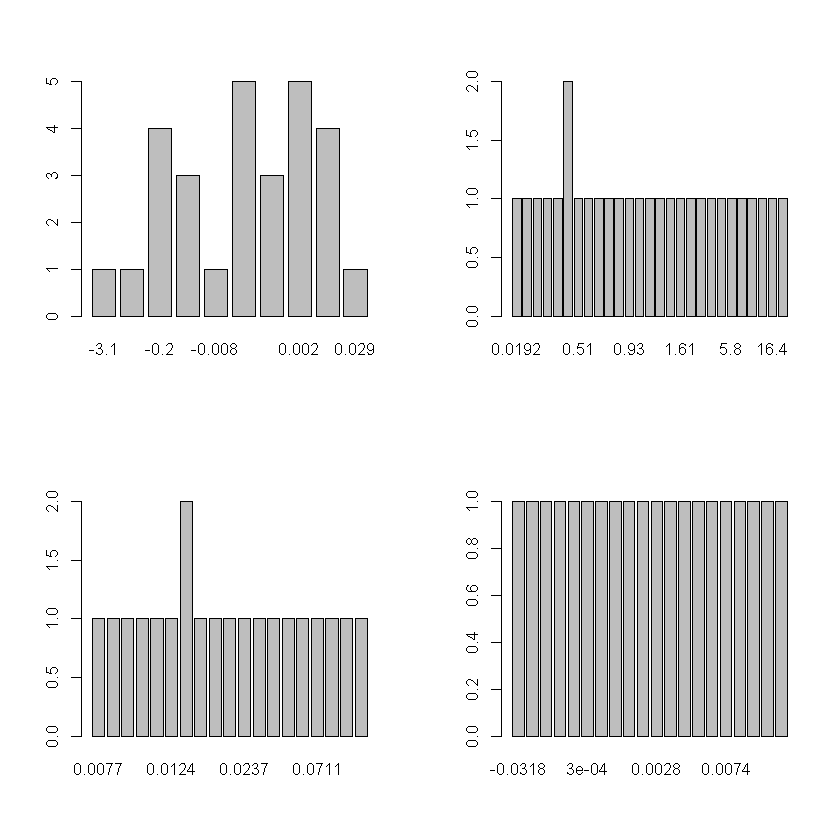

In [13]:
#barplot of numerical columns
par(mfrow=c(2,2))
barplot(table(data_sheet1$Trend))
barplot(table(data_sheet1$Share))
barplot(table(data_sheet2$Ratings))
barplot(table(data_sheet2$Change))

In [18]:
#unique values of programming languages in both the sheets
unique(data_sheet1$Language) 
unique(data_sheet2$Programming_Language)

[1] "Python"       "Java"         "Javascript"   "C#"           "PHP"         
 [6] "C/C++"        "R"            "Objective-C"  "Swift"        "TypeScript"  
[11] "Matlab"       "Kotlin"       "Go"           "Ruby"         "VBA"         
[16] "Rust"         "Scala"        "Visual Basic" "Lua"          "Dart"        
[21] "Ada"          "Perl"         "Groovy"       "Julia"        "Cobol"       
[26] "Abap"         "Delphi"       "Haskell"

[1] "C"                 "Java"              "Python"           
 [4] "C++"               "C#"                "Visual Basic"     
 [7] "JavaScript"        "PHP"               "R"                
[10] "SQL"               "Go"                "Swift"            
[13] "Perl"              "Assembly language" "Ruby"             
[16] "MATLAB"            "Groovy"            "Rust"             
[19] "Objective-C"       "Dart"

In [19]:
print("The total of programming languages from both the data sheets:")
sort(union(data_sheet1$Language,data_sheet2$Programming_Language))

[1] "The total of programming languages from both the data sheets:"


[1] "Abap"              "Ada"               "Assembly language"
 [4] "C"                 "C#"                "C/C++"            
 [7] "C++"               "Cobol"             "Dart"             
[10] "Delphi"            "Go"                "Groovy"           
[13] "Haskell"           "Java"              "Javascript"       
[16] "JavaScript"        "Julia"             "Kotlin"           
[19] "Lua"               "Matlab"            "MATLAB"           
[22] "Objective-C"       "Perl"              "PHP"              
[25] "Python"            "R"                 "Ruby"             
[28] "Rust"              "Scala"             "SQL"              
[31] "Swift"             "TypeScript"        "VBA"              
[34] "Visual Basic"

In [20]:
#C C++ is in one row for sheet 1 data but it appears two times in sheet2 so combining them as C/C++ 
data_sheet2$Ratings[1]=mean(c(data_sheet2$Ratings[1],data_sheet2$Ratings[4]))
data_sheet2$Change[1]=mean(c(data_sheet2$Change[1],data_sheet2$Change[4]))

In [21]:
data_sheet2$Programming_Language[1][data_sheet2$Programming_Language[1] == "C"] <- "C/C++"

In [22]:
#deleting C++ row ffrom data sheet2
data_sheet2=data_sheet2[-c(4),]
#reordering as per ratings
data_sheet2=data_sheet2[order(-data_sheet2$Ratings),]

In [23]:
head(data_sheet2)

Rank_2020,Rank_2019,Programming_Language,Ratings,Change
2,1,Java,0.1348,-0.0318
1,2,C/C++,0.1153,0.0111
3,3,Python,0.1047,0.0059
5,5,C#,0.0458,0.0118
6,6,Visual Basic,0.0412,0.0083
7,7,JavaScript,0.0254,0.0041


In [24]:
#total programming languages from both the sheets
total_lang=union(data_sheet1$Language,data_sheet2$Programming_Language)
sort(total_lang)
cat("Total number of programming languages:",length(total_lang))

[1] "Abap"              "Ada"               "Assembly language"
 [4] "C#"                "C/C++"             "Cobol"            
 [7] "Dart"              "Delphi"            "Go"               
[10] "Groovy"            "Haskell"           "Java"             
[13] "Javascript"        "JavaScript"        "Julia"            
[16] "Kotlin"            "Lua"               "Matlab"           
[19] "MATLAB"            "Objective-C"       "Perl"             
[22] "PHP"               "Python"            "R"                
[25] "Ruby"              "Rust"              "Scala"            
[28] "SQL"               "Swift"             "TypeScript"       
[31] "VBA"               "Visual Basic"

Total number of programming languages: 32

In [25]:
#as the rank of the languages differ so much for both sheets we need to remove the rank columns
data_sheet1=subset(data_sheet1,select=-Rank)
data_sheet2=subset(data_sheet2,select=-c(Rank_2020,Rank_2019))

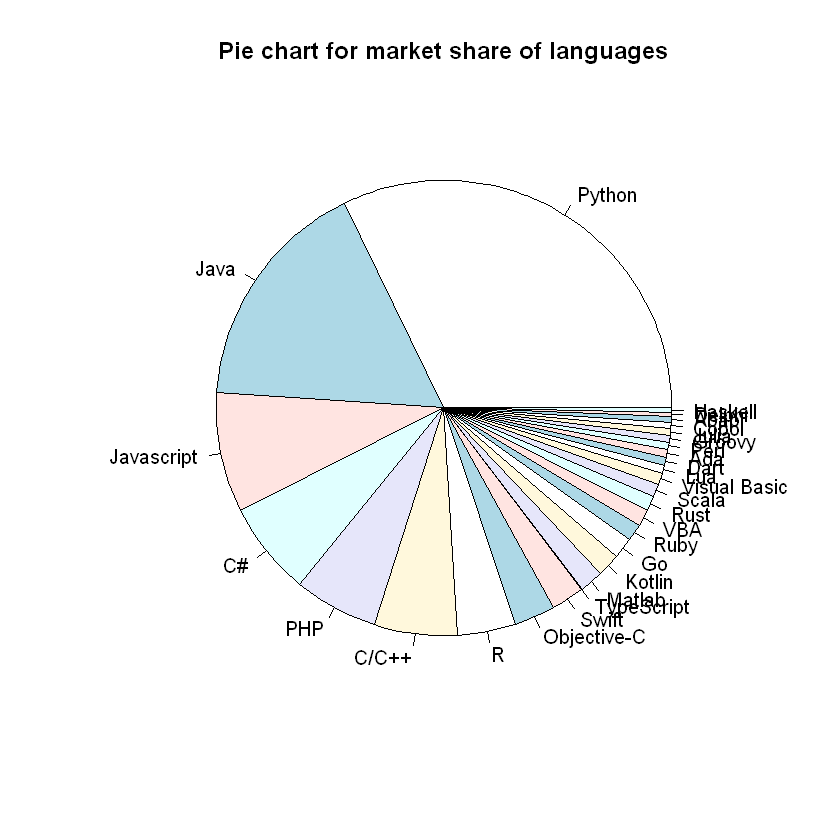

In [26]:
pie(as.numeric(data_sheet1$Share),labels=data_sheet1$Language,main='Pie chart for market share of languages')

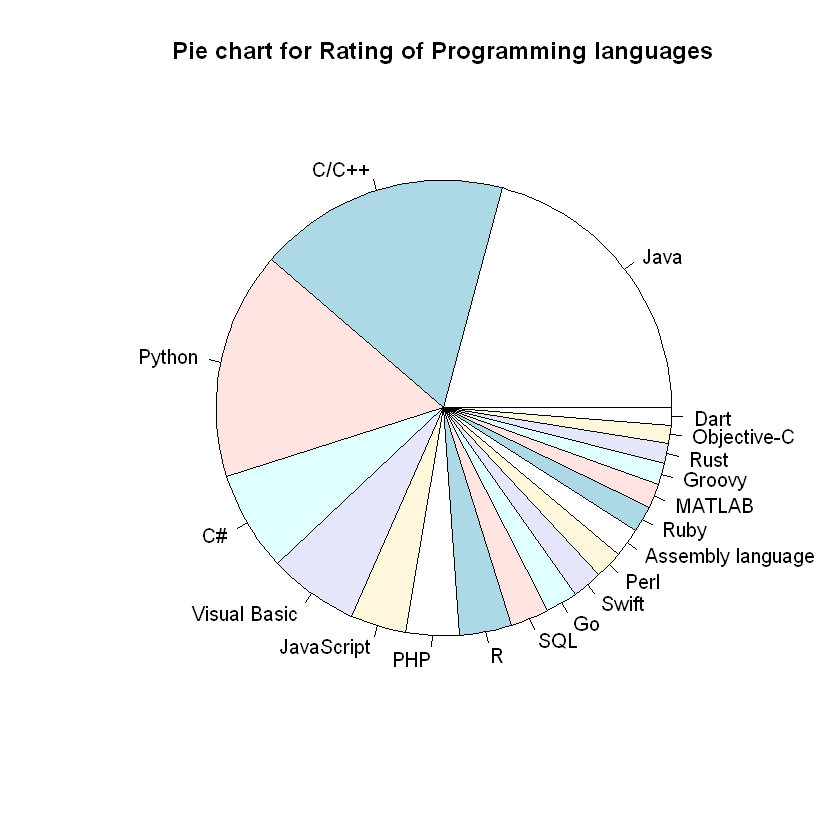

In [22]:
pie(data_sheet2$Ratings,labels=data_sheet2$Programming_Language,main='Pie chart for Rating of Programming languages')

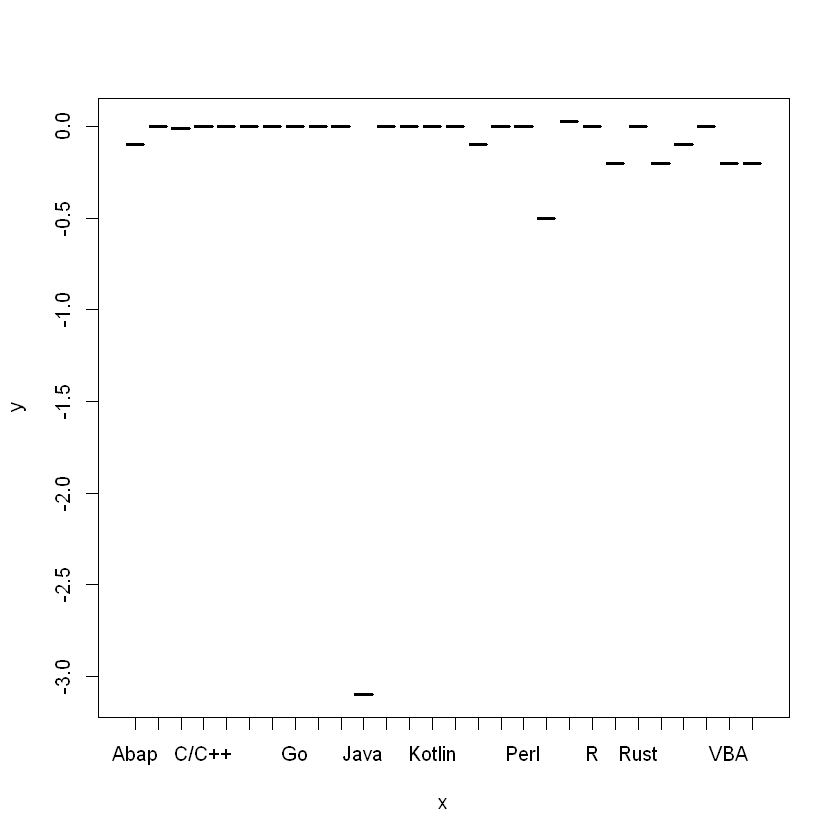

In [33]:
plot(factor(data_sheet1$Language),data_sheet1$Trend)

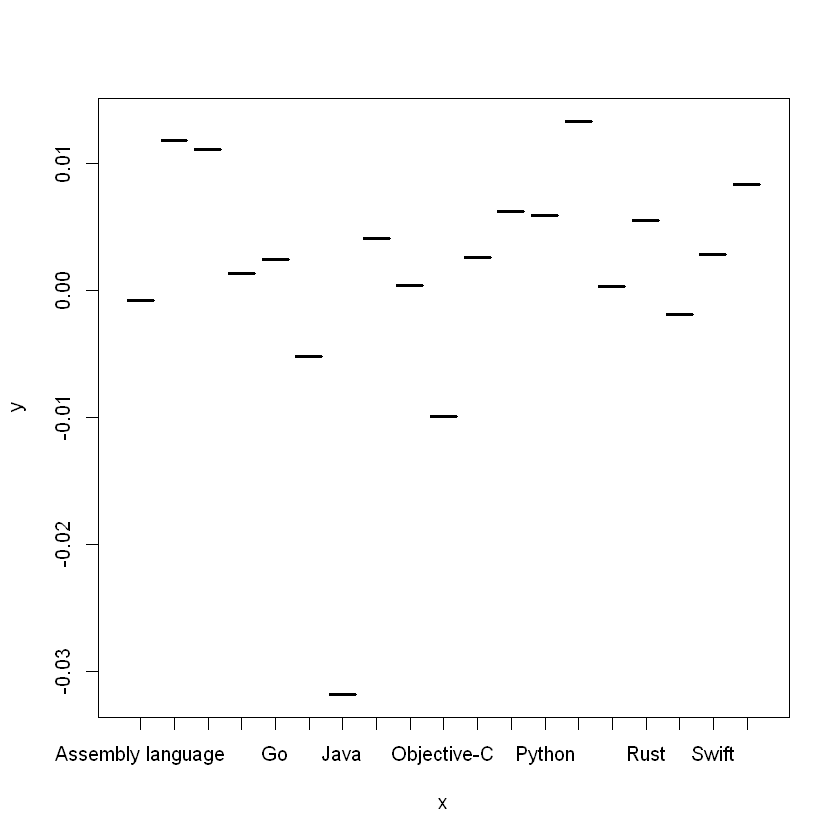

In [34]:
plot(factor(data_sheet2$Programming_Language),data_sheet2$Change)